## Cleaning the data k

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cd C:\Users\kas\Documents\Python_files\titanic

C:\Users\kas\Documents\Python_files\titanic


In [17]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [18]:
train = train.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)
train = train.drop(columns=['Fare','SibSp','Parch'],axis=0)
train=train.fillna(29)
train[:5]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [19]:
test = test.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)
test = test.drop(columns=['Fare','SibSp','Parch'],axis=0)
test=test.fillna(29)
test[:5]

,PassengerId,Pclass,Sex,Age
0,892,3,male,34.5
1,893,3,female,47.0
2,894,2,male,62.0
3,895,3,male,27.0
4,896,3,female,22.0


In [20]:
train['Age']=np.where(train['Age'].between(0,10),0,train['Age'])
train['Age']=np.where(train['Age'].between(10.5,30),1,train['Age'])
train['Age']=np.where(train['Age'].between(30.5,60),2,train['Age'])
train['Age']=np.where(train['Age'].between(60.5,100),3,train['Age'])

In [21]:
test['Age']=np.where(test['Age'].between(0,10),0,test['Age'])
test['Age']=np.where(test['Age'].between(10.5,30),1,test['Age'])
test['Age']=np.where(test['Age'].between(30.5,60),2,test['Age'])
test['Age']=np.where(test['Age'].between(60.5,100),3,test['Age'])

In [22]:
train=pd.get_dummies(train,columns=['Sex'])
train=pd.get_dummies(train,columns=['Age'])
train=pd.get_dummies(train,columns=['Pclass'])
test=pd.get_dummies(test,columns=['Sex'])
test=pd.get_dummies(test,columns=['Age'])
test=pd.get_dummies(test,columns=['Pclass'])

In [23]:
train[:5]

,PassengerId,Survived,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,1,0,1,0,0,0,0,1
1,2,1,1,0,0,0,1,0,1,0,0
2,3,1,1,0,0,1,0,0,0,0,1
3,4,1,1,0,0,0,1,0,1,0,0
4,5,0,0,1,0,0,1,0,0,0,1


In [24]:
test[:5]

,PassengerId,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Pclass_1,Pclass_2,Pclass_3
0,892,0,1,0,0,1,0,0,0,1
1,893,1,0,0,0,1,0,0,0,1
2,894,0,1,0,0,0,1,0,1,0
3,895,0,1,0,1,0,0,0,0,1
4,896,1,0,0,1,0,0,0,0,1


In [25]:
X = train.drop(['Survived','PassengerId'], axis=1).values
Y = train['Survived'].values

In [29]:
pwd

'C:\\Users\\kas\\Documents\\Python_files\\titanic'

## Decision Tree

In [30]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
nsplit=1000
depth=1
errors=[]

In [32]:
while (depth < 7):
    errs=[]
    for j in range(nsplit):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        DT=tree.DecisionTreeClassifier(max_depth=depth)
        DT.fit(XTRAIN,YTRAIN)
        YP=DT.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    errors.append(np.mean(errs))
    depth = depth + 1

Text(0,0.5,'MEAN ERROR')

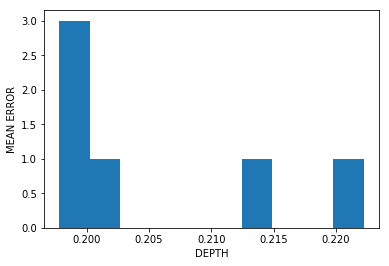

In [38]:
plt.hist(errors)
plt.xlabel("DEPTH")
plt.ylabel("MEAN ERROR")

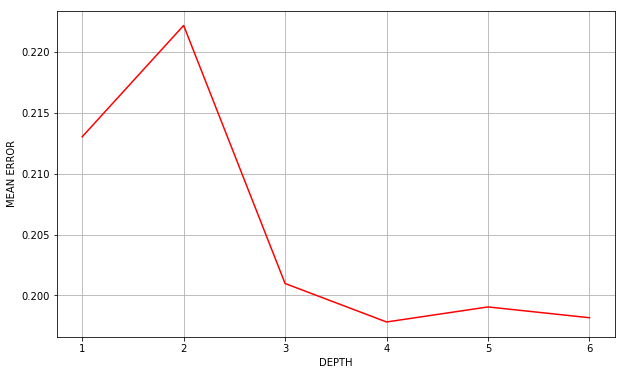

In [36]:
plt.plot((range(1,7)), errors, color='red')
plt.xlabel("DEPTH")
plt.ylabel("MEAN ERROR")
plt.grid()
plt.gcf().set_size_inches(10,6)

In [39]:
nsplits=1000
depth=4
errs=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN, YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD = %7.6f"\
     %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 4 mean error = 0.198287 SD = 0.024591


## Random Forest

In [40]:
from sklearn import ensemble

In [52]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
clf.fit (XTRAIN, YTRAIN)
clf.score (XTEST, YTEST)

0.8295964125560538

In [55]:
X2 = test.drop(['PassengerId'], axis=1).values
clf.fit (X,Y)
predictions = clf.predict(X2)

## Making a Prediction

In [58]:
submission=pd.read_csv("gender_submission.csv")

In [60]:
submission[:3]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [68]:
submission['PassengerId']=test['PassengerId']
submission['Survived']=predictions

In [69]:
submission[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
